In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17448\1512643556.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Đọc file và sử dụng ProfileReport trực quan cơ bản

# Load Dataset

In [2]:
def read_dataset(path):
    df = pd.read_csv(path)
    print("Số người khảo sát:",str(df.shape[0]))
    print("Số đặc trưng:",str(df.shape[1]))
    display(df.head())
    display(df.describe())
    return df
diabetes = read_dataset('diabetes_prediction_dataset.csv')
ProfileReport(diabetes)

Số người khảo sát: 100000
Số đặc trưng: 9


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
print("Giá trị khuyết:\n",str(diabetes.isnull().sum()))

Giá trị khuyết:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [4]:
# Loop through each column and count the number of distinct values
for column in diabetes.columns:
    num_distinct_values = len(diabetes[column].unique())
    print(f"{column}: {num_distinct_values} giá trị khác nhau")

gender: 3 giá trị khác nhau
age: 102 giá trị khác nhau
hypertension: 2 giá trị khác nhau
heart_disease: 2 giá trị khác nhau
smoking_history: 6 giá trị khác nhau
bmi: 4247 giá trị khác nhau
HbA1c_level: 18 giá trị khác nhau
blood_glucose_level: 18 giá trị khác nhau
diabetes: 2 giá trị khác nhau


In [5]:
diabetes["hypertension"] = diabetes["hypertension"] .apply(lambda x: 'Yes' if x==1 else 'No')
diabetes["heart_disease"] = diabetes["heart_disease"] .apply(lambda x: 'Yes' if x==1 else 'No')
diabetes["diabetes"] = diabetes["diabetes"].apply(lambda x: 'Yes' if x==1 else 'No')

In [6]:
# Loại bỏ đi giá trị other (0.00195%)
diabetes = diabetes[diabetes['gender'] != 'Other']

In [7]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,No,Yes,never,25.19,6.6,140,No
1,Female,54.0,No,No,No Info,27.32,6.6,80,No
2,Male,28.0,No,No,never,27.32,5.7,158,No
3,Female,36.0,No,No,current,23.45,5.0,155,No
4,Male,76.0,Yes,Yes,current,20.14,4.8,155,No
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,No,No,No Info,27.32,6.2,90,No
99996,Female,2.0,No,No,No Info,17.37,6.5,100,No
99997,Male,66.0,No,No,former,27.83,5.7,155,No
99998,Female,24.0,No,No,never,35.42,4.0,100,No


In [8]:
print("Các biến liên tục")
continous_columns = diabetes.describe().columns
print(continous_columns)

print("Các biến rời rạc")
categorical_columns = diabetes.describe(include=[object]).columns
print(categorical_columns)

Các biến liên tục
Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
Các biến rời rạc
Index(['gender', 'hypertension', 'heart_disease', 'smoking_history',
       'diabetes'],
      dtype='object')


# Trực quan hóa dữ liệu

## Trực quan đơn biến

### Histogram for age

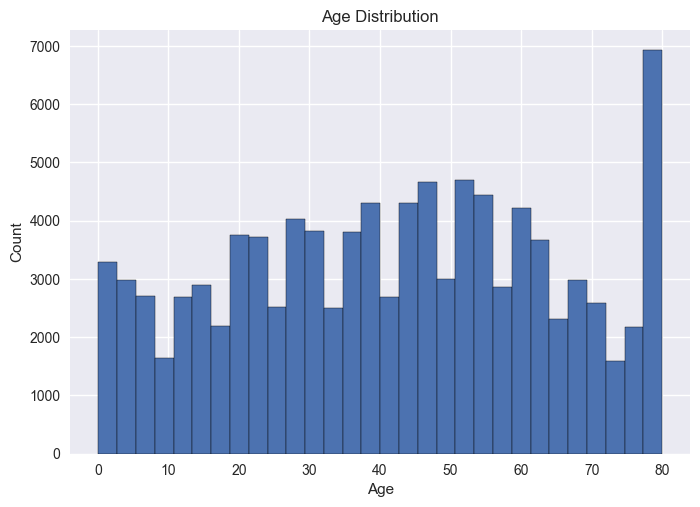

In [9]:
plt.hist(diabetes['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Gender plot

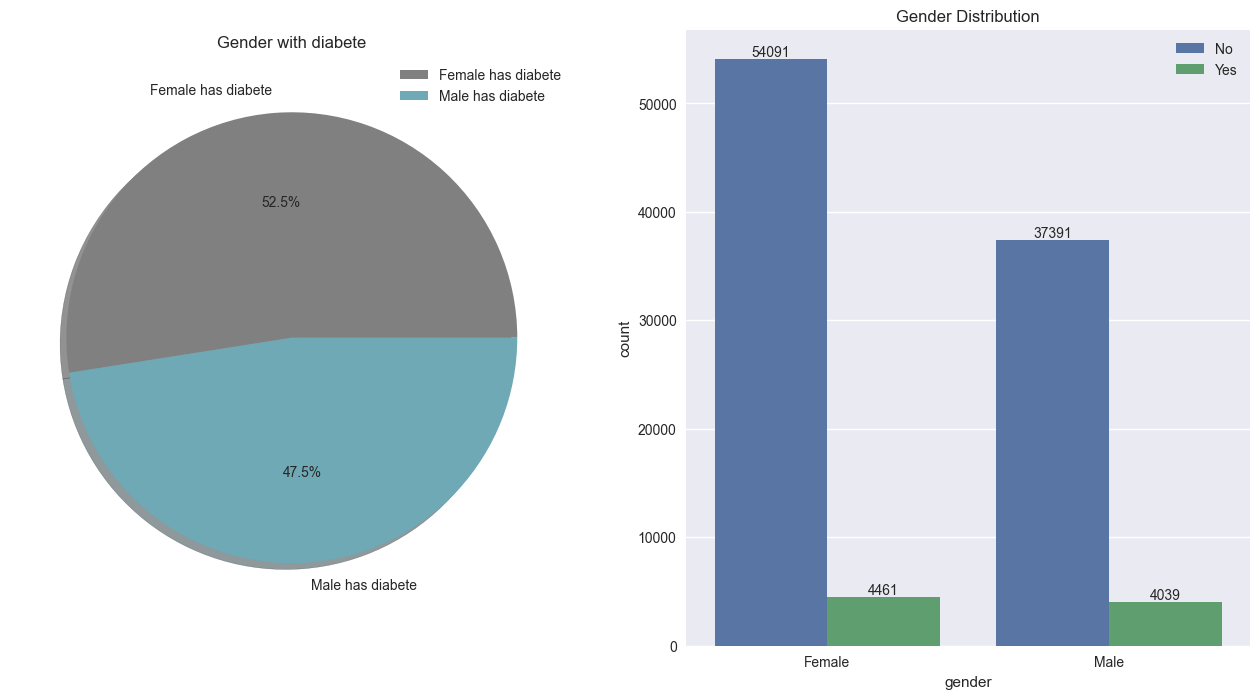

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (16,8))
mylabels = ['Female has diabete','Male has diabete']
axs[0].pie(diabetes[diabetes['diabetes']=='Yes']['gender'].value_counts(), labels=mylabels,colors=['grey','#6ea9b5'],shadow=True, autopct='%1.1f%%')
axs[0].set_title('Gender with diabete')
axs[0].legend()

axs[1] = sns.countplot(x='gender',data=diabetes,hue=diabetes['diabetes'])
[axs[1].bar_label(axs[1].containers[i]) for i in (0,1)]
plt.title('Gender Distribution')
axs[1].legend()
plt.show()

### Distribution plot for BMI

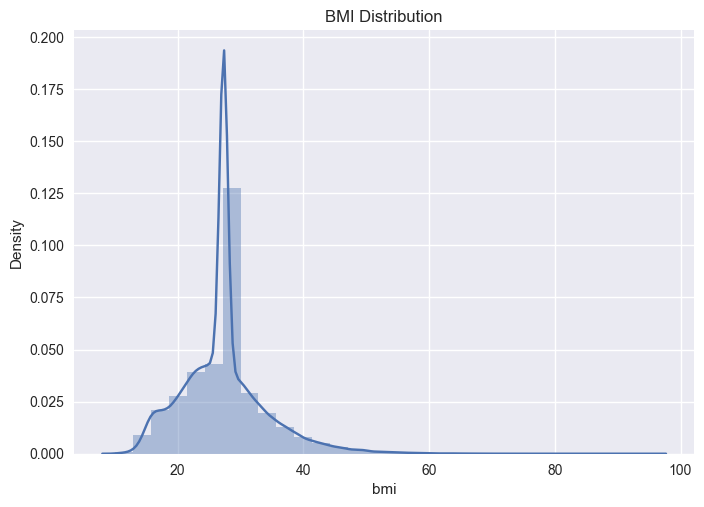

In [11]:
sns.distplot(diabetes['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

### Các biến đếm nhị phân

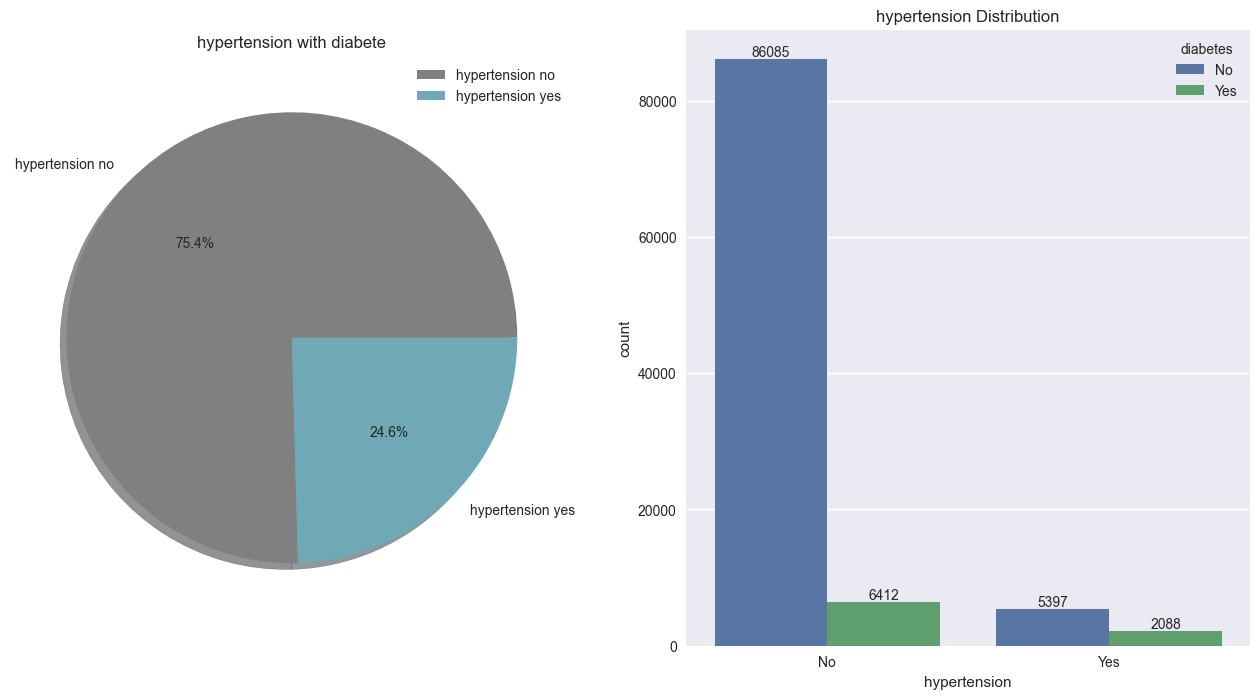

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (16,8))
mylabels = ['hypertension no', 'hypertension yes']
axs[0].pie(diabetes[diabetes['diabetes']=='Yes']['hypertension'].value_counts(), labels=mylabels,colors=['grey','#6ea9b5'],shadow=True, autopct='%1.1f%%')
axs[0].set_title('hypertension with diabete')
axs[0].legend()
axs[1] = sns.countplot(x='hypertension', data=diabetes,hue=diabetes['diabetes'])
[axs[1].bar_label(axs[1].containers[i]) for i in (0,1)]

plt.title('hypertension Distribution')
plt.show()

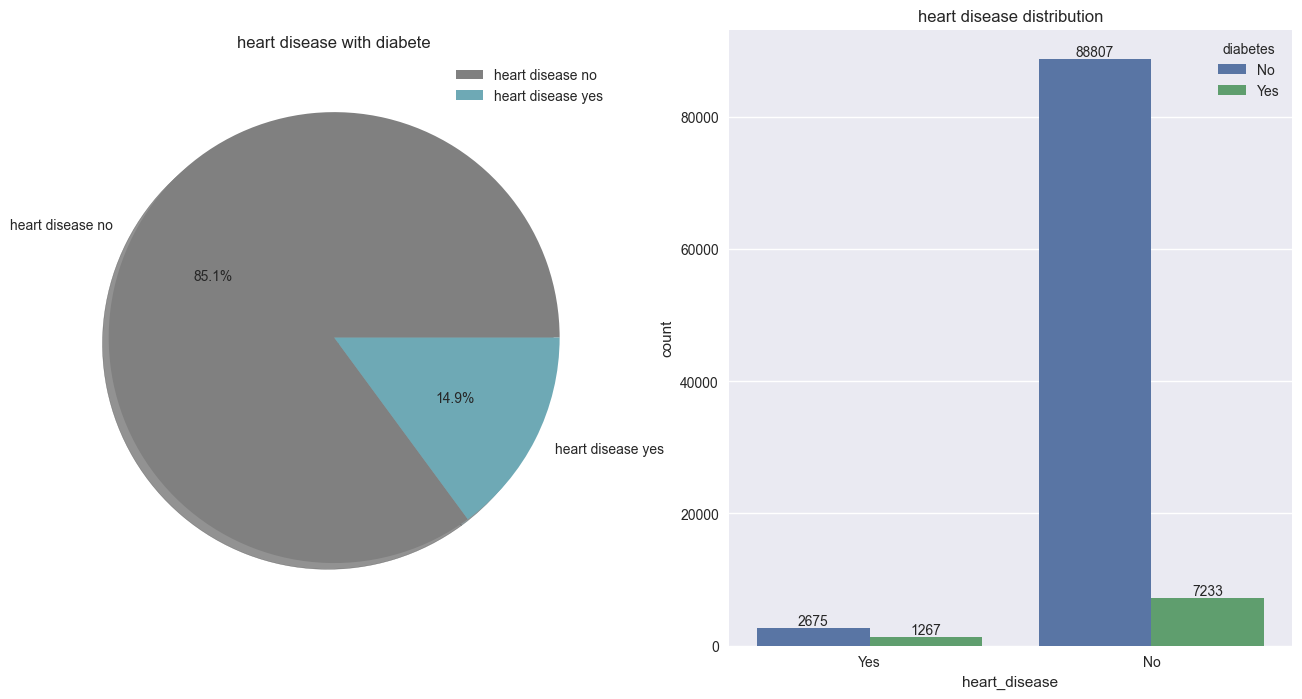

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (16,8))
mylabels = ['heart disease no', 'heart disease yes']
axs[0].pie(diabetes[diabetes['diabetes']=='Yes']['heart_disease'].value_counts(), labels=mylabels,colors=['grey','#6ea9b5'],shadow=True, autopct='%1.1f%%')
axs[0].set_title('heart disease with diabete')
axs[0].legend()
axs[1] = sns.countplot(x='heart_disease', data=diabetes,hue=diabetes['diabetes'])
[axs[1].bar_label(axs[1].containers[i]) for i in (0,1)]
plt.title('heart disease distribution')
plt.show()

### Countplot cho biến smoking

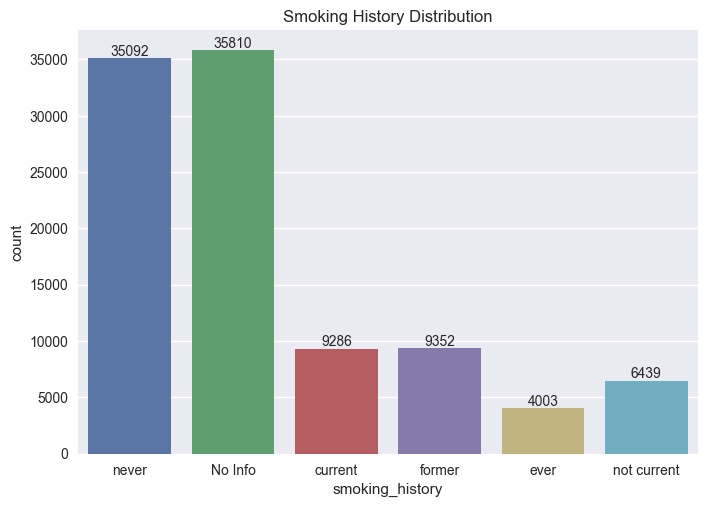

In [14]:
ax = sns.countplot(x='smoking_history', data=diabetes)
ax.bar_label(ax.containers[0])
plt.title('Smoking History Distribution')
plt.show()

## Trực quan đa biến

### Đồ thị bar plot cho 3 biến age, gender và diabetes

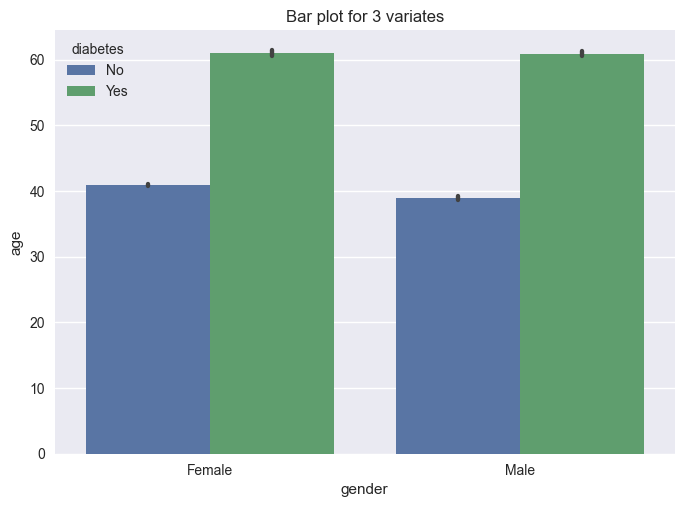

In [15]:
sns.barplot(y='age',x='gender',hue='diabetes',data=diabetes)
plt.title('Bar plot for 3 variates')
plt.show()

### Đồ thị hộp của các đặc trưng

In [16]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
name_cols = ['Age','BMI','Avg Glucose Level (Hemoglobin A1c)','Blood glucose level']

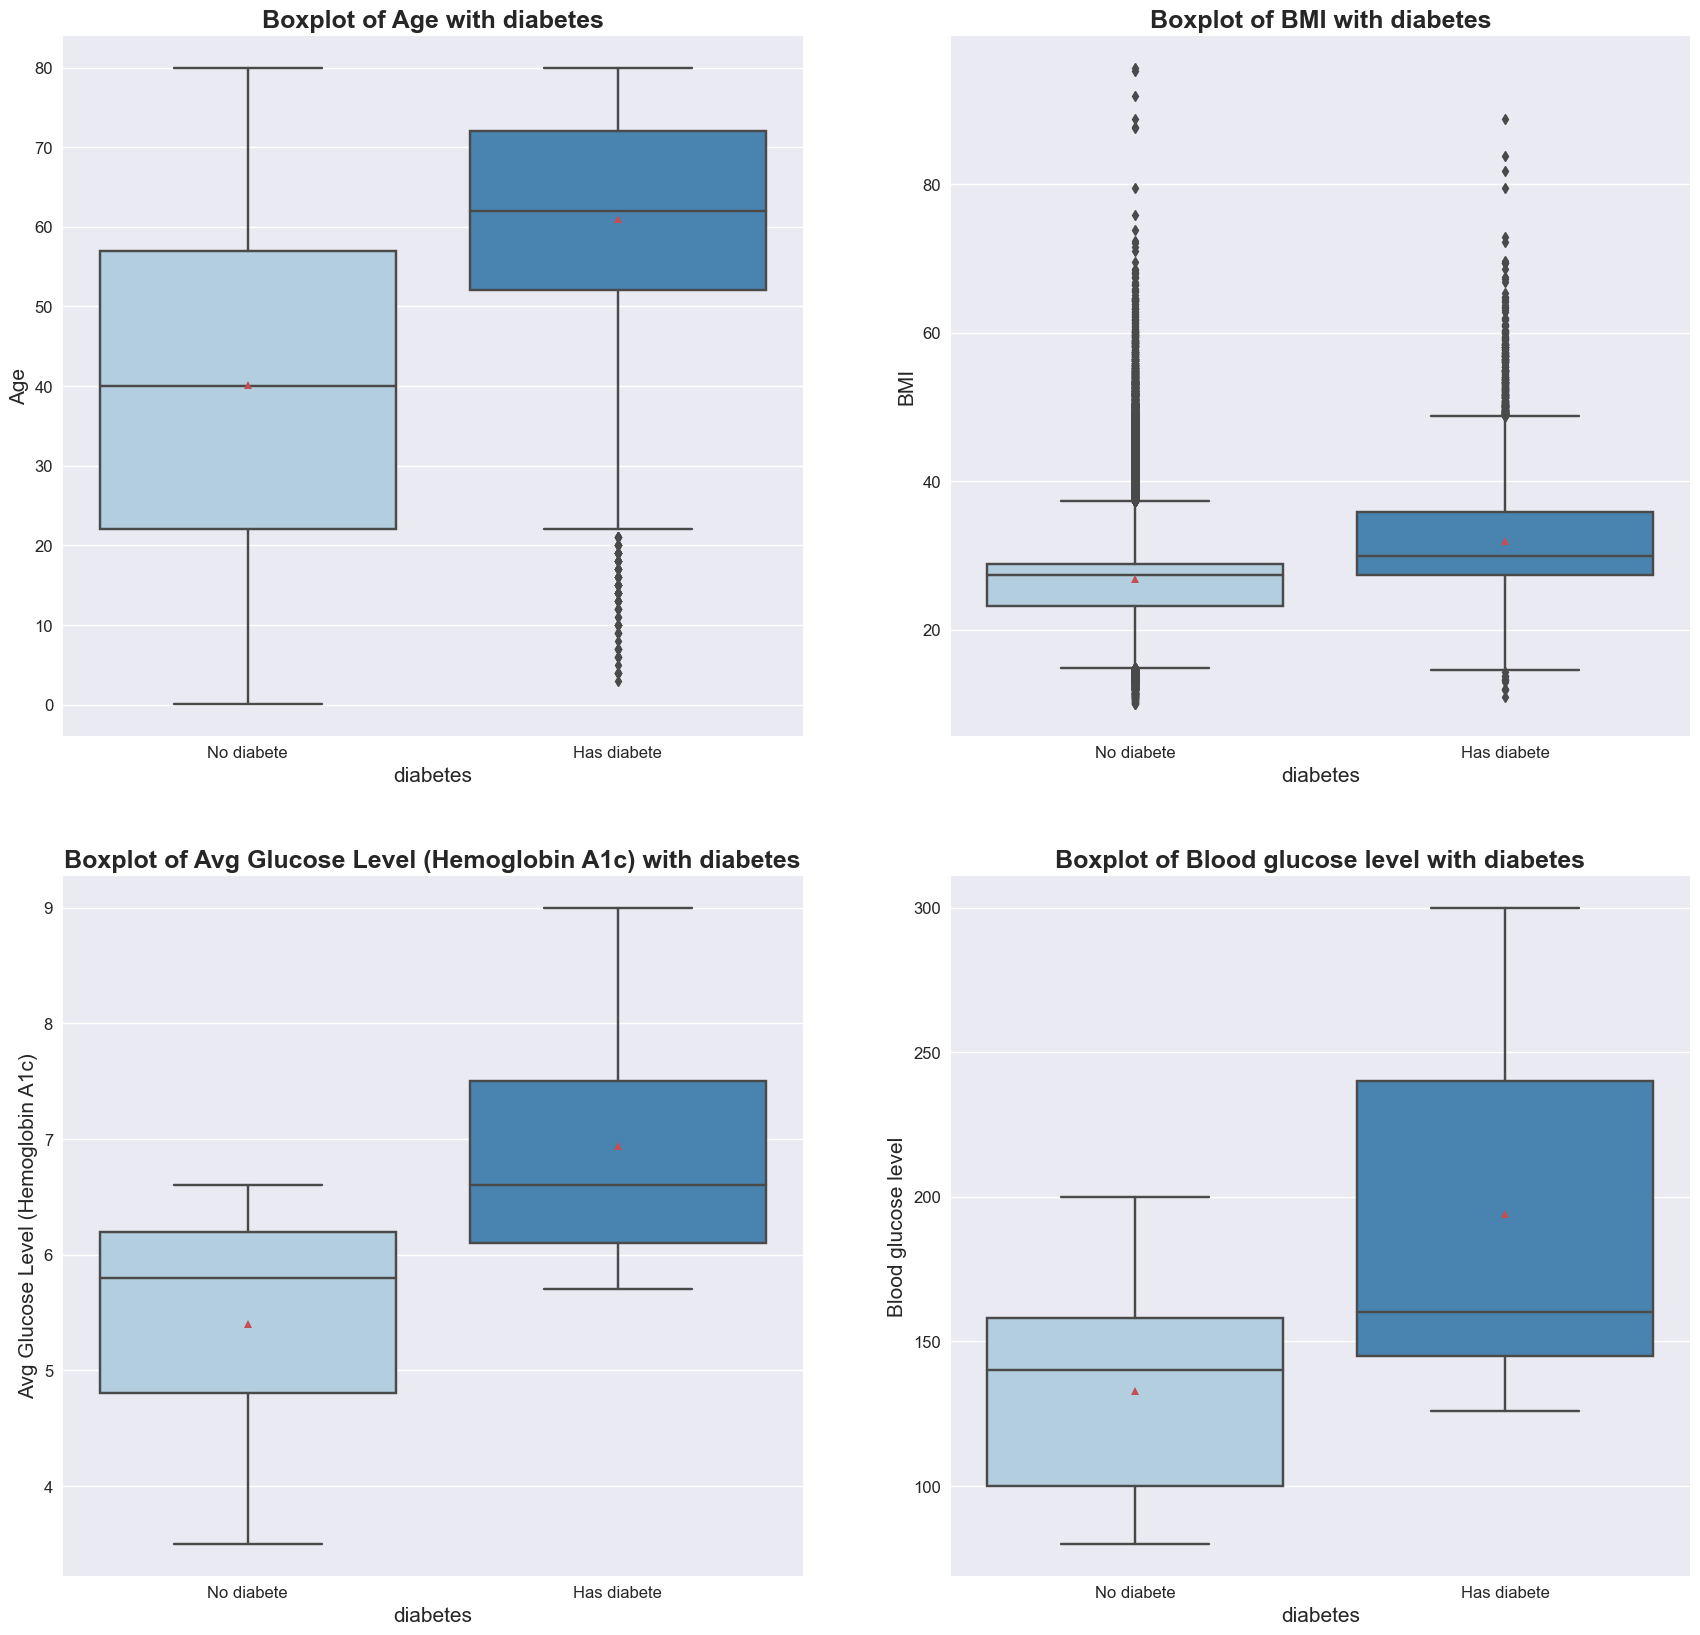

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(21, 20))
a=0
for idx in range(2):
    for i in range(2):
        axs[idx,i] = sns.boxplot(x='diabetes', y=cols[a], data=diabetes, showmeans=True,
                                ax=axs[idx,i],palette="Blues")
        axs[idx,i].set_title(f'Boxplot of {name_cols[a]} with diabetes', fontsize=18, fontweight='bold')
        axs[idx,i].set_xlabel('diabetes', fontsize=15)
        axs[idx,i].set_ylabel(f'{name_cols[a]}', fontsize=15)
        axs[idx,i].set_xticklabels(['No diabete', 'Has diabete'], fontsize=12)
        axs[idx,i].tick_params(axis='both', which='major', labelsize=12)
        a+=1
plt.show()

## Phân tích đa biến

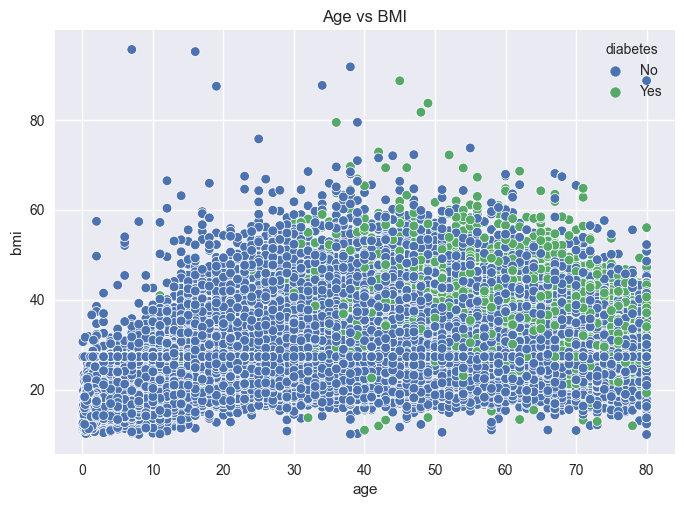

In [18]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=diabetes)
plt.title('Age vs BMI')
plt.show()

### Tương tác giữa các biến gender, BMI and diabetes

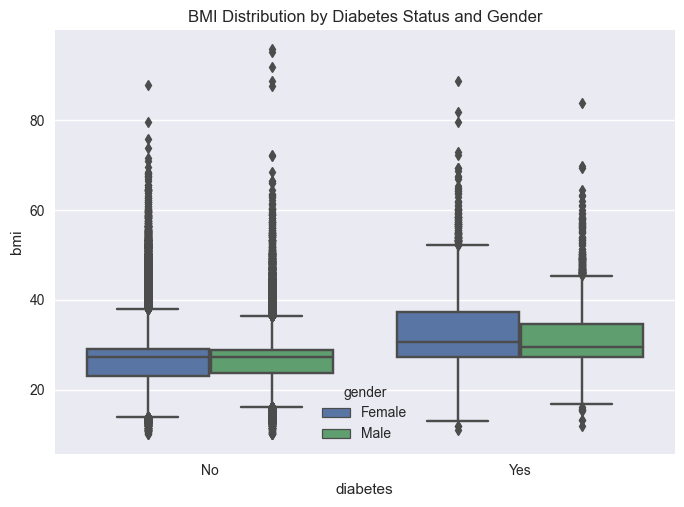

In [19]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=diabetes)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

## Ma trận hiệp tương quan

## Thay đổi các giá trị của cột tình trạng hút thuốc

In [20]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

diabetes['smoking_history'] = diabetes['smoking_history'].apply(recategorize_smoking)

print(diabetes['smoking_history'].value_counts())

smoking_history
non-smoker     70902
past_smoker    19794
current         9286
Name: count, dtype: int64


In [21]:
# chuyển đổi biến rời rạc thành biến số để tính ma trận hiệp tương quan
for i in categorical_columns:
    diabetes[i] = diabetes[i].astype("category").cat.codes

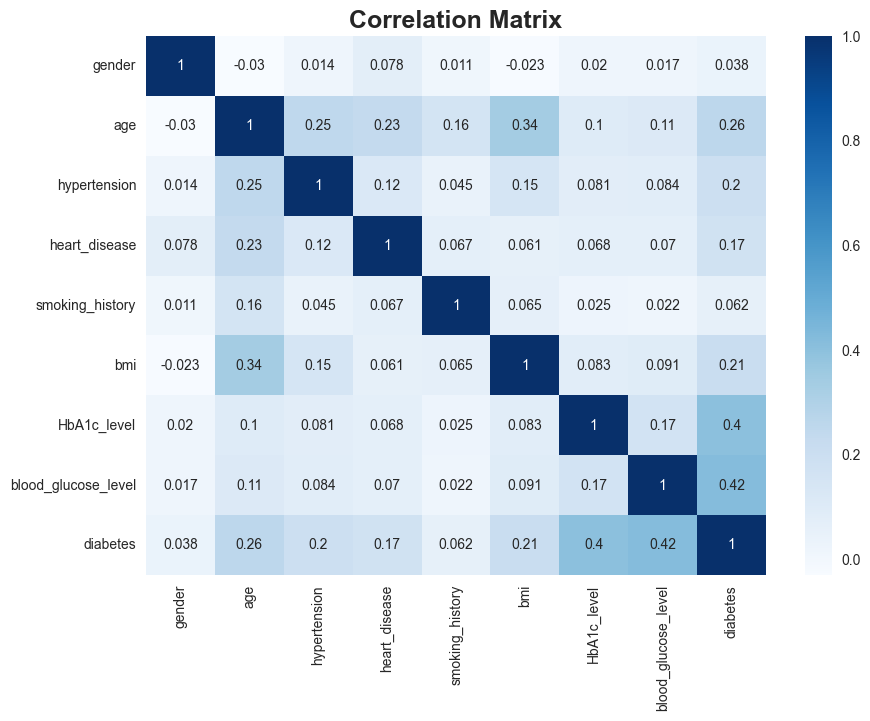

In [22]:
plt.figure(figsize=(10,7))
corrmat = diabetes.corr()
colormap=sns.color_palette("Blues", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)
plt.title('Correlation Matrix', fontsize=18, fontweight="bold")
plt.yticks(rotation=0)
plt.show()

# Xây dựng model

## Xử lý biến

In [23]:
def prepare_X_y(df):
    columns = df.columns.tolist()     # Columns name
    columns.remove('diabetes')           # Remove y label (column charges in this case)
    X = df[columns]        # X 
    y = df.diabetes       # y
    return X, y

X, y = prepare_X_y(diabetes)

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
RANDOM_STATE = 2023
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

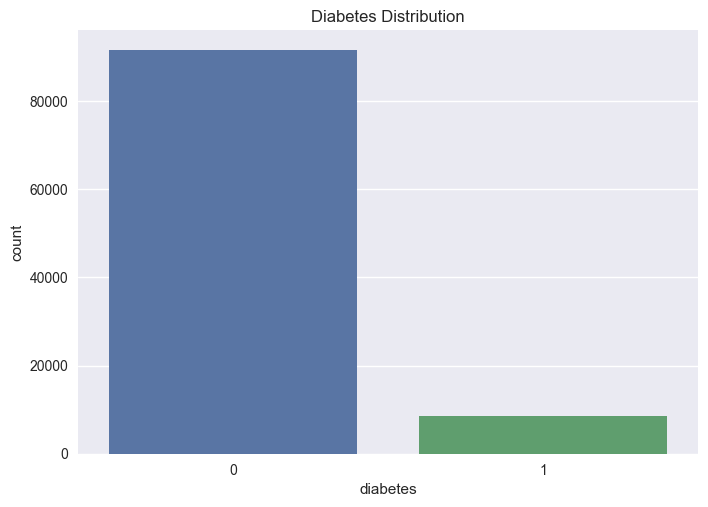

In [25]:
sns.countplot(x='diabetes', data=diabetes)
plt.title('Diabetes Distribution')
plt.show()

In [26]:
# Vì tập data k cần bằng nên ta cần smote nó lại để quá trình huấn luyện ko bị bỏ qua giá trị 1
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [27]:
log_reg_params = {"classifier__C" : [1,2,5,10,100],
                  "classifier__max_iter" : range(100,800,100)}
decTree_params = {'classifier__max_depth': [100,500,1000,5000],
                    'classifier__min_samples_leaf': [2,10,50,100],
                    "classifier__max_features" : [1, 2, 4]}
                    
randomForest_params = {"classifier__n_estimators" : [50, 100, 200],
                       'classifier__max_depth': [None, 10, 20],
                       "classifier__min_samples_leaf" : [2,50,100],
                       "classifier__max_features" : [1, 2, 4]}

xg_params = {"classifier__n_estimators" : [5,10],
            'classifier__max_depth': [5, 10, 20]}

params = {0: log_reg_params,
          1: decTree_params,
          2: randomForest_params,
          3: xg_params }
model_names = ['LogisticRegression','DecisionTreeClassifier',
               'RandomForestClassifier','XGBClassifier']
models= [LogisticRegression,DecisionTreeClassifier,
               RandomForestClassifier,XGBClassifier]

In [28]:
def ml_model(X,y, model, parameters):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
            ('cat', OneHotEncoder(), ['gender','smoking_history'])
        ])

    pipe =  Pipeline(steps=[('preprocessor', preprocessor),
                    ('over', over),
                    ('under', under),
                    ('classifier', model())]) #Build a pipeline with a scaler and a model
    
    grid_search = GridSearchCV(pipe, parameters, cv=5)

    # Train the model
    grid_search.fit(X, y)
    print("Best Parameters: ", grid_search.best_params_)
    return grid_search

## Áp dụng model lên bài toán

In [29]:
model = {}
for i in range(len(model_names)):
    ml = ml_model(trainX,trainY,models[i],params[i])
    model[model_names[i]] = ml

Best Parameters:  {'classifier__C': 1, 'classifier__max_iter': 100}


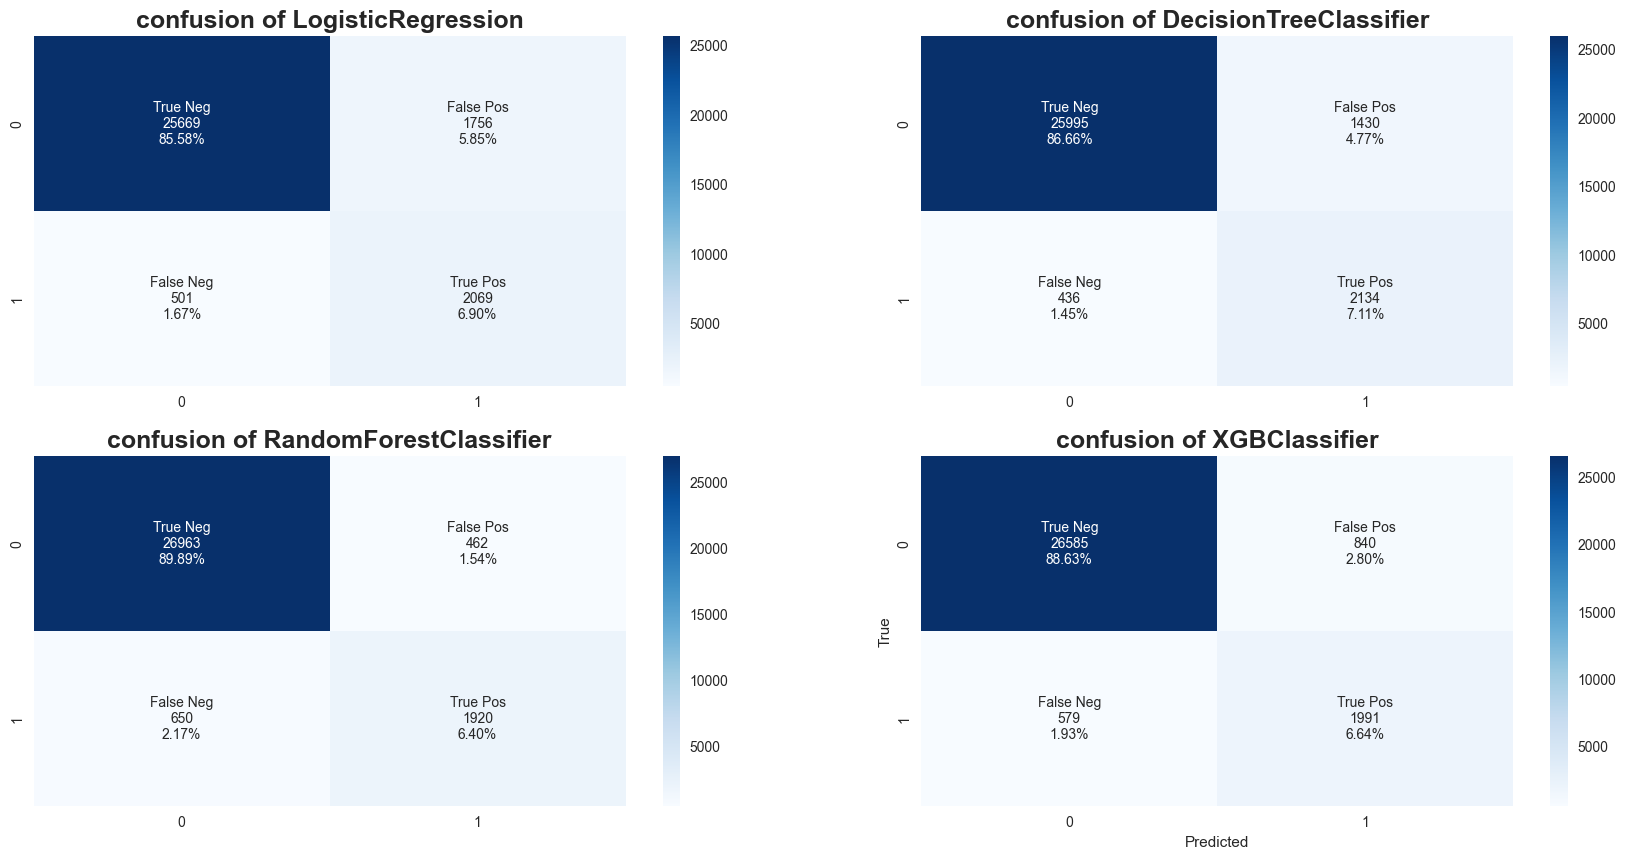

In [ ]:
a=0
fig, axs = plt.subplots(2, 2, figsize=(21, 10))
for idx in range(2):
    for i in range(2):
        cm = confusion_matrix(testY, model[model_names[a]].predict(testX))
        group_names = ['True Neg','False Pos','False Neg','True Pos']

        group_counts = ["{0:0.0f}".format(value) for value in
                        cm.flatten()]

        group_percentages = ["{0:.2%}".format(value) for value in
                            cm.flatten()/np.sum(cm)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]

        labels = np.asarray(labels).reshape(2,2)
        axs[idx,i] = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axs[idx,i])
        axs[idx,i].set_title(f'confusion of {model_names[a]}', fontsize=18, fontweight='bold')
        a+=1
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Tính toán các độ đo

In [ ]:
metrics = {'precision_score':[],
           'recall_score':[],
           'f1_score': []}
for i in range(len(model)):
    y_pred = model[model_names[i]].predict(testX)
    metrics['precision_score'].append(precision_score(testY, y_pred, average='weighted'))
    metrics['recall_score'].append(recall_score(testY, y_pred, average='weighted'))
    metrics['f1_score'].append(f1_score(testY, y_pred, average='weighted'))


In [ ]:
data = pd.DataFrame(metrics,index=model_names)
data

,precision_score,recall_score,f1_score
LogisticRegression,0.943161,0.924754,0.931257
DecisionTreeClassifier,0.950539,0.937790,0.942256
RandomForestClassifier,0.961859,0.962927,0.962287
XGBClassifier,0.955088,0.952692,0.953722


In [ ]:
# chọn ra độ đo có trị số f1 lớn nhất
index = metrics['f1_score'].index(max(metrics['f1_score']))
best_pipeline = model[model_names[i]]
best_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'HbA1c_level',
                                                                          'blood_glucose_level',
                                                                          'hypertension',
                                                                          'heart_disease']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'smoking_history'])])),
                                       ('over', SMOTE(sampling_strategy=0.1)),
                                       ('under',
                                        RandomUnderSampler(sampling_strategy=0.5)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__max_features': [1, 2, 4],
                         'classifier__min_samples_leaf': [2, 50, 100],
                         'classifier__n_estimators': [50, 100, 200]})

### Đặc trưng quan trọng dẫn đến Bệnh đái tháo đường

                Feature  Importance
2           HbA1c_level    0.352762
3   blood_glucose_level    0.289715
0                   age    0.152708
1                   BMI    0.089165
4          hypertension    0.054469
5         heart_disease    0.028909
10    smoking_history_2    0.012984
9     smoking_history_1    0.012983
7              gender_1    0.002618
6              gender_0    0.002438
8     smoking_history_0    0.001247


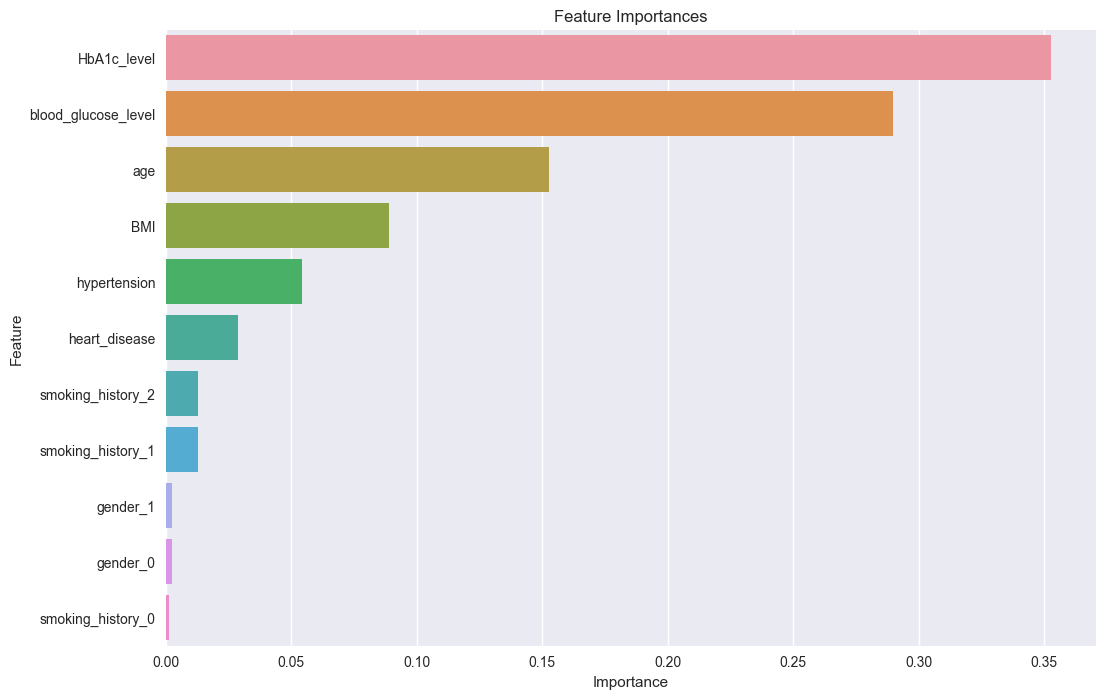

In [ ]:
# After fitting the model, we input feature names
onehot_columns = list(best_pipeline.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = best_pipeline.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()